In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import json

In [2]:
secToSim=pd.read_csv('../output/secToSim.csv')

In [3]:
secToSim

Unnamed: 0      sections
0             0  1.272000e+10
1             1  1.272000e+10
2             2  1.272000e+10
3             3  1.272000e+10
4             4  1.272000e+10
..          ...           ...
226         226  1.272000e+10
227         227  1.272000e+10
228         228  1.272000e+10
229         229  1.272000e+10
230         230  1.272000e+10

[231 rows x 2 columns]

In [4]:
r1=pd.read_csv("../input/R01_indicatori_2011_sezioni.csv",sep=';')

In [5]:
dataForSec=r1[r1["SEZ2011"].isin(secToSim.sections.values)]

In [6]:
dataForSec

CODREG   REGIONE  CODPRO PROVINCIA  CODCOM  COMUNE  PROCOM  \
7627        1  Piemonte       1    Torino     272  Torino    1272   
7628        1  Piemonte       1    Torino     272  Torino    1272   
7629        1  Piemonte       1    Torino     272  Torino    1272   
7630        1  Piemonte       1    Torino     272  Torino    1272   
7632        1  Piemonte       1    Torino     272  Torino    1272   
...       ...       ...     ...       ...     ...     ...     ...   
11231       1  Piemonte       1    Torino     272  Torino    1272   
11236       1  Piemonte       1    Torino     272  Torino    1272   
11248       1  Piemonte       1    Torino     272  Torino    1272   
11256       1  Piemonte       1    Torino     272  Torino    1272   
11259       1  Piemonte       1    Torino     272  Torino    1272   

           SEZ2011  NSEZ  ACE  ...  E22  E23  E24  E25  E26  E27  E28  E29  \
7627   12720000069    69   18  ...    0    0    0    1    0   10    0    0   
7628   12720000070    70   18  ...    0    0    1    0    0    5    0    1   
7629   12720000071    71   18  ...    0    0    0    0    0    0    0    0   
7630   12720000072    72   18  ...    0    4    4    0    0   36    1    2   
7632   12720000074    74   18  ...    0    0    0    0    0    1    0    1   
...            ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11231  12720003781  3781  157  ...    9    4    3    0    0   53   15    4   
11236  12720003806  3806   48  ...    0    2    1    0    4  158    4    3   
11248  12720003818  3818   48  ...    0    0    0    0    2  179    1    1   
11256  12720003826  3826  130  ...    1    1    0    0    3  163    2    4   
11259  12720003829  3829  157  ...    7    8    6   11    5  349    4   25   

       E30  E31  
7627     1    0  
7628     0    0  
7629     0    0  
7630     5    0  
7632     0    0  
...    ...  ...  
11231    0    0  
11236    0    0  
11248    1    1  
11256    0    0  
11259   10    2  

[231 rows x 152 columns]

In [7]:
df=pd.read_csv('../input/yearConsumption.csv')

In [8]:
breaks=[0, 6257707.272222223, 13439563.54111111, 19344494.04888889, 27177505.89666667]

In [9]:
df["cat"]=pd.cut(df.Wh,bins=breaks,labels=range(1,5))


In [10]:
df

Unnamed: 0  buildingID            Wh cat
0            0          63  1.248827e+07   2
1            1         109  2.717751e+07   4
2            2         136  1.302986e+07   2
3            3         142  2.591449e+07   4
4            4         152  5.831390e+06   1
5            5         270  6.257707e+06   1
6            6         292  1.077325e+07   2
7            7         302  9.360166e+06   2
8            8         304  1.934449e+07   3
9            9         314  1.343956e+07   2
10          10         325  1.011751e+07   2
11          11         327  1.257441e+07   2
12          12         335  1.116653e+07   2
13          13         345  1.834512e+07   3
14          14         625  5.047415e+06   1
15          15         673  9.178032e+06   2
16          16         679  1.456337e+07   3
17          17         696  5.371117e+06   1
18          18         769  1.843317e+07   3
19          19         792  1.524495e+07   3
20          20         812  1.143005e+07   2
21          21         825  1.541206e+07   3
22          22         826  2.262481e+07   4
23          23         835  1.288380e+07   2

In [ ]:
familySizes=['PF3','PF4','PF5','PF6']

In [15]:
fakeHouses={}

In [26]:
len(dataForSec)

231

In [41]:
simulated=pd.read_csv('../output/simulatedHouses.csv')

In [42]:
simulated

t             P
0     2013-01-01 00:00:00  6.100700e+06
1     2013-01-01 01:00:00  6.625447e+06
2     2013-01-01 02:00:00  5.269890e+06
3     2013-01-01 03:00:00  4.987661e+06
4     2013-01-01 04:00:00  4.977578e+06
...                   ...           ...
8732  2013-12-30 20:00:00  1.020322e+07
8733  2013-12-30 21:00:00  1.204306e+07
8734  2013-12-30 22:00:00  1.030935e+07
8735  2013-12-30 23:00:00  9.171297e+06
8736  2013-12-31 00:00:00  8.633986e+06

[8737 rows x 2 columns]

<AxesSubplot:>

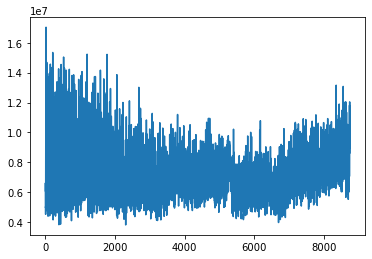

In [43]:
simulated.P.plot()

In [44]:
simulated.t=pd.to_datetime(simulated['t'])
simulated=simulated.set_index('t').resample('h').mean()

In [45]:
simulated

P
t                                
2013-01-01 00:00:00  6.100700e+06
2013-01-01 01:00:00  6.625447e+06
2013-01-01 02:00:00  5.269890e+06
2013-01-01 03:00:00  4.987661e+06
2013-01-01 04:00:00  4.977578e+06
...                           ...
2013-12-30 20:00:00  1.020322e+07
2013-12-30 21:00:00  1.204306e+07
2013-12-30 22:00:00  1.030935e+07
2013-12-30 23:00:00  9.171297e+06
2013-12-31 00:00:00  8.633986e+06

[8737 rows x 1 columns]

In [46]:
temp=pd.read_csv('../output/powersTest.csv')

In [47]:
temp

Unnamed: 0  groupID                                                  P
0              0        2  [68.19, 68.19, 68.19, 68.19, 68.19, 68.19, 68....
1              1        3  [113.65, 113.65, 113.65, 113.65, 113.65, 113.6...
2              2        4  [272.76, 272.76, 272.76, 272.76, 272.76, 272.7...
3              3        5  [250.03, 250.03, 250.03, 250.03, 250.03, 250.0...
4              4        6  [68.19, 68.19, 68.19, 68.19, 68.19, 68.19, 68....
...          ...      ...                                                ...
7654        7654    11353  [45.46, 45.46, 45.46, 45.46, 45.46, 45.46, 45....
7655        7655    11354  [204.57, 204.57, 204.57, 204.57, 204.57, 204.5...
7656        7656    11356  [45.46, 45.46, 45.46, 45.46, 45.46, 45.46, 45....
7657        7657    11357  [22.73, 22.73, 22.73, 22.73, 22.73, 22.73, 22....
7658        7658    11358  [863.74, 863.74, 863.74, 863.74, 863.74, 863.7...

[7659 rows x 3 columns]

In [48]:
len([float(x) for x in json.loads(temp.iloc[0].P)])

8760

In [49]:
P=None
for i,r in temp.iterrows():
    p=np.array([float(x) for x in json.loads(temp.iloc[0].P)])
    if P is None:
        P=p
    else:
        P+=p

In [50]:
len(P)

8760

In [51]:
len(pd.date_range(start='2013-01-01',end='2013-12-31',freq='1h'))

8737

In [52]:
pp=pd.DataFrame({'t':pd.date_range(start='2013-01-01',end='2013-12-31',freq='1h'),'production':P[:len(pd.date_range(start='2013-01-01',end='2013-12-31',freq='1h'))]})

In [53]:
pp.t=pd.to_datetime(pp['t'])
pp=pp.set_index('t')

In [54]:
pp

production
t                              
2013-01-01 00:00:00   522267.21
2013-01-01 01:00:00   522267.21
2013-01-01 02:00:00   522267.21
2013-01-01 03:00:00   522267.21
2013-01-01 04:00:00   522267.21
...                         ...
2013-12-30 20:00:00   522267.21
2013-12-30 21:00:00   522267.21
2013-12-30 22:00:00   522267.21
2013-12-30 23:00:00   522267.21
2013-12-31 00:00:00   522267.21

[8737 rows x 1 columns]

In [55]:
df=simulated.join(pp)

<AxesSubplot:xlabel='t'>

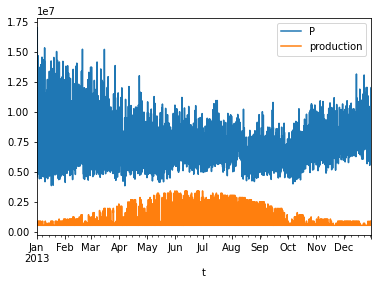

In [56]:
df.plot()

In [57]:
sum(df.production)/sum(df.P)

0.10735794730030929